In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***REGRESION LINEAL MULTIPLE***

Montaje de Google Drive: Se monta Google Drive en Colab para acceder a los archivos.

Carga del archivo .mat: Utilizamos scipy.io para cargar el archivo .mat que contiene las puntuaciones de las imágenes. Se extraen las puntuaciones de entrenamiento y prueba, y luego se concatenan.

Cargar imágenes: Usamos OpenCV y cv2_imshow para mostrar algunas imágenes del dataset junto con sus puntuaciones.

Carga del archivo CSV: Se carga un archivo CSV con las características de las imágenes y sus etiquetas. Luego, se realiza un preprocesamiento de las características, eliminando una columna innecesaria.

División del dataset: Se divide el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba) utilizando train_test_split.

Normalización de las características: Se normalizan las características utilizando la media y la desviación estándar del conjunto de entrenamiento.

Implementación de la regresión múltiple: Se define la función de costo para la regresión y se implementa el algoritmo de descenso por gradiente para optimizar los parámetros del modelo (theta).

Evaluación del modelo: El modelo es evaluado utilizando el error cuadrático medio (MSE) y la raíz del error cuadrático medio (RMSE).

### Proscesamiento de datos

Este bloque carga un archivo .mat (formato de MATLAB) usando la librería scipy.io.

Función loadmat: Carga el contenido del archivo en un diccionario de Python.

print(mat.keys()): Muestra las claves disponibles dentro del archivo .mat para que puedas saber qué datos están disponibles (por ejemplo, nombres de imágenes, puntuaciones, etc.).

In [ ]:
import scipy.io

# Cargar el archivo
mat = scipy.io.loadmat('/content/drive/MyDrive/Primer_Parcial_IA/deepImageAestheticsAnalysis-master/AADBinfo.mat')

# Ver todas las claves disponibles
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'testNameList', 'testScore', 'trainNameList', 'trainScore'])


train_scores = mat['trainScore'].flatten(): Extrae las puntuaciones de las imágenes de entrenamiento y las convierte en un arreglo plano (1D).

test_scores = mat['testScore'].flatten(): Extrae las puntuaciones de las imágenes de prueba y las convierte en un arreglo plano (1D).

np.concatenate([train_scores, test_scores]): Combina las puntuaciones de entrenamiento y prueba en un solo arreglo.

print(f"Total de imágenes: {len(all_scores)}"): Muestra el total de imágenes de entrenamiento y prueba combinadas.

print(all_scores[:10]): Muestra las primeras 10 puntuaciones para verificar que todo esté correcto.

In [ ]:
train_scores = mat['trainScore'].flatten()
test_scores = mat['testScore'].flatten()

# Concatenar ambos si quieres tenerlos todos juntos
import numpy as np
all_scores = np.concatenate([train_scores, test_scores])

print(f"Total de imágenes: {len(all_scores)}")
print(all_scores[:10])  # Mostrar los primeros 10 scores

Total de imágenes: 9458
[0.3   0.7   0.4   0.6   0.45  0.775 0.5   0.2   0.2   0.65 ]


In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Necesario en Colab para mostrar imágenes con cv2
import os


In [ ]:
folder_path = "/content/drive/MyDrive/Primer_Parcial_IA/datasetImages_warp256"
image_files = sorted(os.listdir(folder_path))  # Asegúrate de que estén ordenadas


train_names y test_names: Extraen los nombres de las imágenes de los datos de entrenamiento y prueba del archivo .mat.

all_names = np.concatenate([train_names, test_names]): Combina ambos conjuntos de nombres en una sola lista, de manera que cada nombre corresponda con una puntuación.

In [ ]:

# Flatten para que los scores estén como listas planas
train_scores = mat['trainScore'].flatten()
test_scores = mat['testScore'].flatten()

# Nombres de imágenes
train_names = mat['trainNameList'].flatten()
test_names = mat['testNameList'].flatten()

# Combinar
import numpy as np
all_scores = np.concatenate([train_scores, test_scores])
all_names = np.concatenate([train_names, test_names])

Score: 0.300 - Imagen: farm1_333_19438364933_087c8abc60_b.jpg


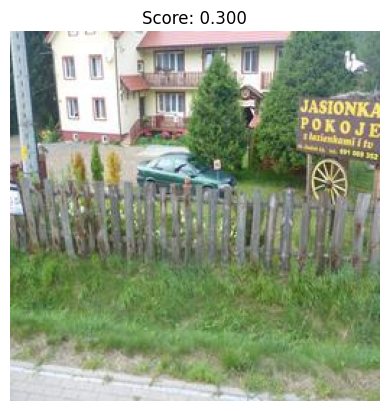

Score: 0.700 - Imagen: farm1_452_19898743300_201156d984_b.jpg


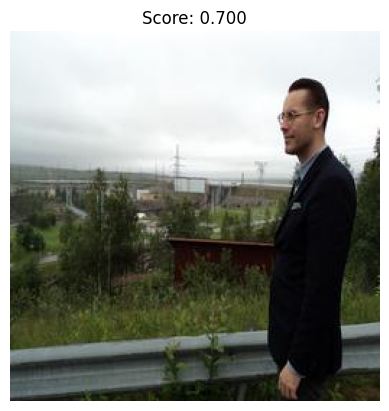

Score: 0.400 - Imagen: farm1_281_20247100976_c8141d3653_b.jpg


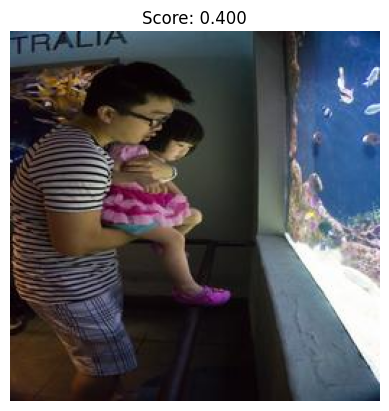

Score: 0.600 - Imagen: farm1_448_19709457333_be4c6bb5eb_b.jpg


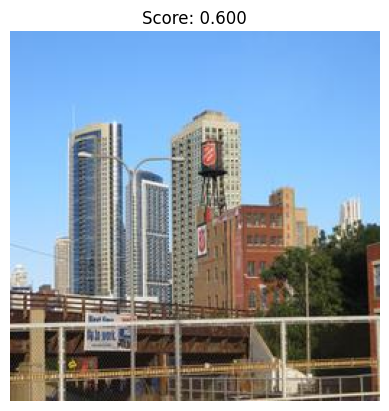

Score: 0.450 - Imagen: farm1_393_20179744375_c119001350_b.jpg


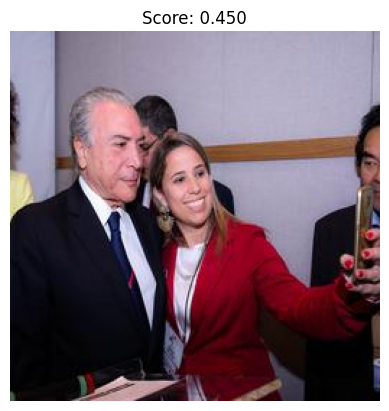

In [ ]:
import matplotlib.pyplot as plt

# Mostrar 5 imágenes en RGB con matplotlib
for i in range(5):
    img_name = all_names[i][0]
    score = all_scores[i]
    img_path = os.path.join(folder_path, img_name)

    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        print(f"Score: {score:.3f} - Imagen: {img_name}")

        plt.imshow(img_rgb)
        plt.title(f"Score: {score:.3f}")
        plt.axis("off")
        plt.show()
    else:
        print(f"Imagen no encontrada: {img_path}")


## *Extracción de Características de Imágenes*


En este bloque de código se extraen 20 características de cada imagen del dataset, con el objetivo de capturar aspectos importantes que permitan describir y cuantificar las propiedades visuales de las imágenes para su posterior análisis y modelado (por ejemplo, en tareas de regresión o clasificación). Se eligieron estas características porque combinan información sobre color, textura, bordes y la forma de la imagen, ofreciendo una representación integral de la estética y el contenido de la imagen.

**¿Por qué se eligieron estas características?**

1. **Color (Medias y Desviaciones Estándar):**  
   - *Media de R, G, B:* Permite conocer el tono predominante en la imagen, lo cual es crucial para detectar la presencia de colores cálidos o fríos.  
   - *Desviación estándar de R, G, B:* Mide la dispersión de los valores de color, indicando la uniformidad o variación en la intensidad de cada canal de color.
  
2. **Estadísticas de Histogramas (Mediana y Valor Máximo):**  
   - *Mediana de cada canal:* Representa el valor central de la distribución de intensidades, ayudando a detectar si la imagen se inclina hacia tonos oscuros o claros.  
   - *Valor máximo del histograma:* Identifica el nivel de intensidad más frecuente, lo que puede ser indicativo de áreas sobresalientes o dominantes en la imagen.

3. **Textura (GLCM: Matriz de Co-ocurrencia de Niveles de Gris):**  
   - *Contraste, Energía y Homogeneidad:* Estas propiedades de la matriz GLCM ofrecen una medida de la textura de la imagen. El contraste indica la variación local, la energía mide la uniformidad y la homogeneidad muestra la similitud en la distribución de los niveles de gris. Esto es fundamental para reconocer patrones o irregularidades en la estructura de la imagen.

4. **Entropía:**  
   - La entropía (calculada mediante la entropía de Shannon) mide el desorden o la complejidad en la imagen. Una mayor entropía sugiere mayor complejidad y diversidad en la información visual, lo que puede relacionarse con la percepción estética o la riqueza de detalles.

5. **Bordes (Detección con Canny):**  
   - *Promedio, Conteo y Densidad de Bordes:* La detección de bordes permite identificar contornos y transiciones significativas. Estas métricas permiten cuantificar la cantidad y relevancia de los contornos presentes, lo que es útil para describir formas y estructuras dentro de la imagen.

6. **Proporción de Aspecto:**  
   - La relación entre ancho y alto indica la forma de la imagen (por ejemplo, cuadrada, rectangular), lo cual puede influir en la interpretación visual y en la identificación de posibles distorsiones o formatos específicos.

**Resumen del proceso en el código:**

- **Lectura y conversión de imágenes:** Cada imagen se carga y se convierte a formato RGB para un manejo adecuado de los colores y a escala de grises para ciertos análisis de textura y entropía.
- **Cálculo de estadísticas de color:** Se computan la media, desviación estándar, mediana y los histogramas para cada canal de color.
- **Extracción de características de textura:** Se utiliza la matriz GLCM para obtener contraste, energía y homogeneidad, junto con la entropía.
- **Detección de bordes:** Se aplican técnicas de detección de bordes (Canny) para cuantificar características relacionadas con la presencia de contornos en la imagen.
- **Medición de la proporción de aspecto:** Se calcula la relación entre ancho y alto para entender el formato de la imagen.
- **Construcción del conjunto de datos:** Cada imagen se procesa individualmente, y las 20 características resultantes se almacenan en un array que se empareja con su score correspondiente (etiqueta). Este proceso se repite para todas las imágenes, generando el dataset de entrada para el modelo.

Este enfoque integral en la extracción de características se eligió porque permite capturar diversas propiedades visuales y estructurales de las imágenes, lo que es esencial para que un modelo de aprendizaje automático pueda aprender de forma robusta y precisa la relación entre las características de las imágenes y sus correspondientes scores.



In [ ]:
#!pip install scikit-image

In [ ]:
# import cv2
# import numpy as np
# import os
# from skimage.feature import graycomatrix, graycoprops
# from skimage.measure import shannon_entropy
# from tqdm import tqdm

# # Ruta de tus imágenes
# folder_path = "/content/drive/MyDrive/Primer_Parcial_IA/datasetImages_warp256"

# # Lista de imágenes y scores
# image_names = [name[0] for name in all_names]
# scores = all_scores  # Y reales

# # Función para extraer características de una imagen
# def extract_features(img_path):
#     try:
#         img = cv2.imread(img_path)
#         img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         h, w, _ = img_rgb.shape
#         img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

#         # --- 1. Color: media R, G, B ---
#         mean_r = np.mean(img_rgb[:,:,0])
#         mean_g = np.mean(img_rgb[:,:,1])
#         mean_b = np.mean(img_rgb[:,:,2])

#         # --- 2. Color: desviación estándar R, G, B ---
#         std_r = np.std(img_rgb[:,:,0])
#         std_g = np.std(img_rgb[:,:,1])
#         std_b = np.std(img_rgb[:,:,2])

#         # --- 3. Histogramas: mediana y max por canal ---
#         med_r = np.median(img_rgb[:,:,0])
#         med_g = np.median(img_rgb[:,:,1])
#         med_b = np.median(img_rgb[:,:,2])

#         hist_r = cv2.calcHist([img_rgb], [0], None, [256], [0,256])
#         hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0,256])
#         hist_b = cv2.calcHist([img_rgb], [2], None, [256], [0,256])
#         max_hist_r = np.max(hist_r)
#         max_hist_g = np.max(hist_g)
#         max_hist_b = np.max(hist_b)

#         # --- 4. Textura GLCM ---
#         glcm = graycomatrix(img_gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
#         contrast = graycoprops(glcm, 'contrast')[0,0]
#         energy = graycoprops(glcm, 'energy')[0,0]
#         homogeneity = graycoprops(glcm, 'homogeneity')[0,0]

#         # --- 5. Entropía ---
#         entropy = shannon_entropy(img_gray)

#         # --- 6. Bordes con Canny ---
#         edges = cv2.Canny(img_gray, 100, 200)
#         avg_edges = np.mean(edges)
#         count_edges = np.sum(edges > 0)
#         density_edges = count_edges / (h * w)

#         # --- 7. Proporción de aspecto ---
#         aspect_ratio = w / h

#         # Juntamos las 20 características
#         return [
#             mean_r, mean_g, mean_b,
#             std_r, std_g, std_b,
#             med_r, med_g, med_b,
#             max_hist_r, max_hist_g, max_hist_b,
#             contrast, energy, homogeneity, entropy,
#             avg_edges, count_edges, density_edges, aspect_ratio
#         ]
#     except:
#         return None

# # Extraer features de todas las imágenes
# X = []
# y = []

# for i in tqdm(range(len(image_names))):
#     img_path = os.path.join(folder_path, image_names[i])
#     feats = extract_features(img_path)
#     if feats is not None:
#         X.append(feats)
#         y.append(scores[i])

# # Convertimos a arrays
# X = np.array(X)
# y = np.array(y)

# print(f"Conjunto final: {X.shape[0]} imágenes, {X.shape[1]} características")

In [ ]:
# # Verificar longitudes de all_scores y all_names
# print(f"Longitud de all_scores: {len(all_scores)}")
# print(f"Longitud de all_names: {len(all_names)}")

# # Verificar si las imágenes y sus puntuaciones coinciden
# assert len(all_scores) == len(all_names), "El número de imágenes no coincide con el número de puntuaciones."


In [ ]:
# # Verificar que todas las características estén correctamente extraídas
# print(f"Longitud de X después de la extracción: {len(X)}")
# print(f"Longitud de y después de la extracción: {len(y)}")

In [ ]:
# X = []
# y = []

# for i in tqdm(range(len(image_names))):
#     img_path = os.path.join(folder_path, image_names[i])
#     feats = extract_features(img_path)
#     if feats is not None:
#         X.append(feats)  # Ahora esto funcionará
#         y.append(scores[i])



cargamos el archivo csv con el dataset y lo dividimos en  X,Y
lo convertimos a array

In [ ]:
import pandas as pd

# Ruta del archivo CSV
csv_path = "/content/drive/MyDrive/features_y_labels.csv"

# Cargar el CSV en un DataFrame
df = pd.read_csv(csv_path)

# Ver las primeras filas para asegurarse de que los datos se cargaron correctamente
print(df.head())

# Asumimos que todas las columnas excepto la última son características (X), y la última columna es la etiqueta (y)
X = df.iloc[:, :-1].values  # Todas las filas y todas las columnas excepto la última
y = df.iloc[:, -1].values   # Solo la última columna

# Verificar las dimensiones
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

       feat_1      feat_2      feat_3     feat_4     feat_5     feat_6  \
0  135.572952  148.134888  120.221466  51.384104  43.681617  55.191530   
1  119.632446  122.610001  114.074783  92.654932  93.524897  99.867598   
2   71.542679   71.343369   76.856339  54.866844  55.718886  61.967913   
3  123.881393  142.049850  159.160431  44.694583  59.576150  88.339977   
4  108.595093   85.655533   98.197693  73.186639  73.866216  79.468329   

   feat_7  feat_8  feat_9  feat_10  ...  feat_12     feat_13   feat_14  \
0   123.0   141.0   105.0   1230.0  ...    733.0  434.002420  0.014493   
1    83.0    86.0    68.0   1611.0  ...   2068.0  125.608333  0.057867   
2    58.0    62.0    59.0    896.0  ...   1027.0  195.918964  0.028690   
3   127.0   168.0   159.0   1085.0  ...   7213.0  466.823790  0.053325   
4   131.0    86.0    82.0   1221.0  ...   1297.0  289.190824  0.043815   

    feat_15   feat_16    feat_17  feat_18   feat_19  feat_20  label  
0  0.121405  7.356244  47.937012  12320.

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape)

(9458, 20)


In [ ]:
print(y.shape)

(9458,)


In [ ]:
print(f"Dimensiones de X: {np.array(X).shape}")
print(f"Dimensiones de y: {np.array(y).shape}")

Dimensiones de X: (9458, 20)
Dimensiones de y: (9458,)


In [ ]:

print("Primeras 10 características:")
print(X[:10])
# Mostrar las primeras 10 etiquetas
print(y[:10])

Primeras 10 características:
[[1.35572952e+02 1.48134888e+02 1.20221466e+02 5.13841045e+01
  4.36816171e+01 5.51915302e+01 1.23000000e+02 1.41000000e+02
  1.05000000e+02 1.23000000e+03 8.47000000e+02 7.33000000e+02
  4.34002420e+02 1.44928910e-02 1.21404757e-01 7.35624416e+00
  4.79370117e+01 1.23200000e+04 1.87988281e-01 1.00000000e+00]
 [1.19632446e+02 1.22610001e+02 1.14074783e+02 9.26549321e+01
  9.35248968e+01 9.98675976e+01 8.30000000e+01 8.60000000e+01
  6.80000000e+01 1.61100000e+03 1.89500000e+03 2.06800000e+03
  1.25608333e+02 5.78672745e-02 4.40199093e-01 7.34212685e+00
  1.84394073e+01 4.73900000e+03 7.23114014e-02 1.00000000e+00]
 [7.15426788e+01 7.13433685e+01 7.68563385e+01 5.48668441e+01
  5.57188859e+01 6.19679129e+01 5.80000000e+01 6.20000000e+01
  5.90000000e+01 8.96000000e+02 7.74000000e+02 1.02700000e+03
  1.95918964e+02 2.86895073e-02 3.49719099e-01 7.35980904e+00
  2.91240692e+01 7.48500000e+03 1.14212036e-01 1.00000000e+00]
 [1.23881393e+02 1.42049850e+02 1.5916

In [ ]:
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

Dimensiones de X: (9458, 20)
Dimensiones de y: (9458,)


In [ ]:
X = np.delete(X, 19, axis=1)  # Eliminar la columna 19

In [ ]:
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

Dimensiones de X: (9458, 19)
Dimensiones de y: (9458,)


dividimos datos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones después de la división
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (7566, 19)
Dimensiones de X_test: (1892, 19)
Dimensiones de y_train: (7566,)
Dimensiones de y_test: (1892,)


normalizamos los datos

In [ ]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
print(X.shape)

(9458, 19)


In [ ]:
X_norm, mu, sigma = featureNormalize(X_train)

print(X[:5])
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm[:5])

[[1.35572952e+02 1.48134888e+02 1.20221466e+02 5.13841045e+01
  4.36816171e+01 5.51915302e+01 1.23000000e+02 1.41000000e+02
  1.05000000e+02 1.23000000e+03 8.47000000e+02 7.33000000e+02
  4.34002420e+02 1.44928910e-02 1.21404757e-01 7.35624416e+00
  4.79370117e+01 1.23200000e+04 1.87988281e-01]
 [1.19632446e+02 1.22610001e+02 1.14074783e+02 9.26549321e+01
  9.35248968e+01 9.98675976e+01 8.30000000e+01 8.60000000e+01
  6.80000000e+01 1.61100000e+03 1.89500000e+03 2.06800000e+03
  1.25608333e+02 5.78672745e-02 4.40199093e-01 7.34212685e+00
  1.84394073e+01 4.73900000e+03 7.23114014e-02]
 [7.15426788e+01 7.13433685e+01 7.68563385e+01 5.48668441e+01
  5.57188859e+01 6.19679129e+01 5.80000000e+01 6.20000000e+01
  5.90000000e+01 8.96000000e+02 7.74000000e+02 1.02700000e+03
  1.95918964e+02 2.86895073e-02 3.49719099e-01 7.35980904e+00
  2.91240692e+01 7.48500000e+03 1.14212036e-01]
 [1.23881393e+02 1.42049850e+02 1.59160431e+02 4.46945835e+01
  5.95761501e+01 8.83399771e+01 1.27000000e+02 1.6

In [ ]:
m = X_norm.shape[0]
print(m)
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

7566


In [ ]:
print(X_norm.shape)

(7566, 20)


In [ ]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J


In [ ]:
# Cálculo del costo con theta inicial (todos ceros)
JJ = calcularCosto(X_norm, y_train, theta)
print(f"Con theta inicial: {theta} se obtiene un costo de: {JJ}")

Con theta inicial: [ 0.51306151 -0.00362419  0.02913342 -0.01808517  0.01439128 -0.05195919
  0.02302744 -0.0125051   0.03394708 -0.01058586  0.00774089 -0.01382429
  0.03330463 -0.00223348 -0.00811213  0.00571162  0.01210974  0.00691064
  0.00691064  0.00691064] se obtiene un costo de: 0.015825261391037116


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        # Actualización de theta con el descenso por gradiente
        theta = theta - (alpha / m) * X.T.dot(np.dot(X, theta) - y)  # Usar transpuesta de X

        # Guardar el costo en cada iteración
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

Este bloque de código realiza el entrenamiento de un modelo de regresión utilizando el descenso por gradiente y luego grafica cómo el costo
𝐽
(
𝜃
)
J(θ) converge a lo largo de las iteraciones.

theta calculado por el descenso por el gradiente: [ 0.51306151 -0.00362419  0.02913342 -0.01808517  0.01439128 -0.05195919
  0.02302744 -0.0125051   0.03394708 -0.01058586  0.00774089 -0.01382429
  0.03330463 -0.00223348 -0.00811213  0.00571162  0.01210974  0.00691064
  0.00691064  0.00691064]


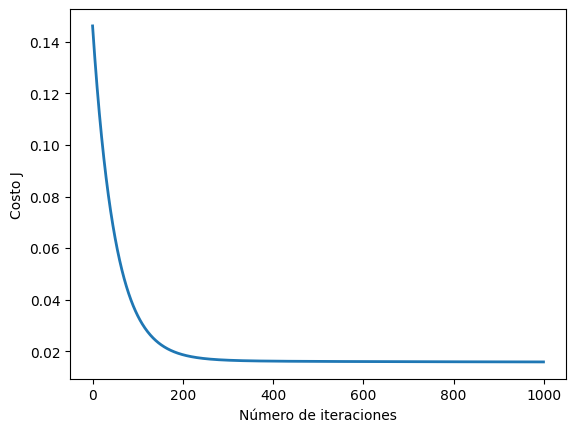

In [ ]:
import matplotlib.pyplot as pyplot
# Paso 1: Entrenamiento con descenso por gradiente
alpha = 0.01  # tasa de aprendizaje
num_iters = 1000  # número de iteraciones
theta = np.zeros(20)
theta, J_history = gradientDescentMulti(X_norm, y_train, theta, alpha, num_iters)
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

Este bloque de código realiza la predicción sobre el conjunto de prueba (X_test) utilizando los parámetros
𝜃
θ obtenidos previamente con el descenso por gradiente.

In [ ]:
# Paso 1: Normalizar X_test con los mismos parámetros que X_train
X_test_norm = (X_test - mu) / sigma

# Paso 2: Agregar la columna de unos para el término independiente
X_test_norm = np.hstack([np.ones((X_test_norm.shape[0], 1)), X_test_norm])

# Paso 3: Función de predicción
def hacer_prediccion(X_nuevo, theta):
    return np.dot(X_nuevo, theta)

# Paso 4: Hacer las predicciones
predicciones = hacer_prediccion(X_test_norm, theta)

# Paso 5: Mostrar las primeras predicciones
print("Primeras predicciones:", predicciones[:10])
print(y_test[:10])


Primeras predicciones: [0.6532276  0.46038688 0.56717439 0.46687278 0.53055949 0.58242647
 0.47575188 0.63482237 0.530998   0.52088121]
[0.55 0.05 0.35 0.55 0.65 0.6  0.45 0.7  0.6  0.2 ]


MSE mide el error cuadrático medio entre las predicciones y los valores reales, lo que penaliza más los errores grandes.

RMSE es la raíz cuadrada del MSE y tiene la ventaja de estar en las mismas unidades que los valores de salida, lo que lo hace más interpretable.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicciones)

# Calcular el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MSE: 0.03269088496734326
RMSE: 0.1808062083207965


### Conclusiones
El vector de parámetros (theta) calculado por el descenso por gradiente tiene valores positivos y negativos. Estos valores representan las ponderaciones que se asignan a cada una de las características del modelo para predecir la variable objetivo. Algunos de estos valores son pequeños (en el rango de
10
−
2
10
−2
  o
10
−
3
10
−3
 ), lo que indica que la influencia de ciertas características es relativamente baja en la predicción.
 La diferencia entre las predicciones y las etiquetas reales es notoria. Aunque el modelo está bastante cerca de los valores reales en algunos casos (por ejemplo, la predicción de 0.653 vs la etiqueta real de 0.65), en otros casos, como en la predicción de 0.460 frente a 0.05, hay un margen significativo de error.
 El MSE y RMSE relativamente pequeños son buenos, pero dado que hay algunas predicciones con un error notable,

# ***RED NEURONAL***

Se importa la librería torch, que es esencial para trabajar con PyTorch, una de las bibliotecas más utilizadas en el aprendizaje profundo.

In [ ]:
import torch

Aquí se verifica si hay una GPU disponible para acelerar el procesamiento. El código no hace nada con esta línea, pero la idea es comprobar si PyTorch puede utilizar CUDA (el framework de Nvidia para aceleración por GPU). Si devuelve True, se puede hacer uso de la GPU.

In [ ]:
torch.cuda.is_available()

True

torch.from_numpy(): Convierte los arrays de NumPy a tensores de PyTorch. En este caso, X_train y y_train son tus datos de entrada y salida respectivamente.

.float(): Convierte los datos a tipo float32 (común en redes neuronales).

.cuda(): Mueve los tensores a la GPU para acelerar el procesamiento.

In [ ]:
X_t = torch.from_numpy(X_train).float().cuda()
Y_t = torch.from_numpy(y_train).float().cuda()

Se imprimen las dimensiones de los tensores X_t y Y_t. Esto ayuda a verificar que los datos están en la forma esperada antes de usarlos para entrenar el modelo.

In [ ]:
print(f"Dimensiones de X_t: {X_t.shape}")
print(f"Dimensiones de Y_t: {Y_t.shape}")


Dimensiones de X_t: torch.Size([7566, 19])
Dimensiones de Y_t: torch.Size([7566])


torch.nn.Sequential(): Crea un modelo secuencial donde las capas se apilan una después de otra.

torch.nn.Linear(): Define una capa totalmente conectada (o capa densa).

D_in es el número de entradas (19 en este caso).

H, H2, H3 son el tamaño de las capas ocultas.

D_out es la salida final, que en este caso es un valor único (porque es regresión).

torch.nn.ReLU(): Aplica la función de activación ReLU, que es común en redes neuronales para introducir no linealidad.

.to("cuda"): Mueve el modelo a la GPU para aprovechar la aceleración de hardware.



In [ ]:
D_in, H, H2, H3, D_out = 19, 1000, 800, 500, 1

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),
    torch.nn.ReLU(),
    torch.nn.Linear(H3, D_out),
).to("cuda")

torch.nn.MSELoss(): Usamos la función de pérdida de error cuadrático medio (MSE), que es común en problemas de regresión. La idea es minimizar la diferencia entre las predicciones y los valores reales.

torch.optim.Adam(): Es un optimizador que ajusta los pesos de la red neuronal. Adam es muy eficiente y se usa comúnmente debido a su rapidez y rendimiento.

In [ ]:
criterion = torch.nn.MSELoss()  # Para regresión, usamos MSELoss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam

model.train(): Establece el modelo en modo de entrenamiento. Algunas capas, como Dropout o BatchNorm, se comportan de manera diferente durante el entrenamiento y la evaluación.

for e in range(1, epochs+1):: El ciclo de entrenamiento que se ejecuta durante un número determinado de épocas (500 en este caso).

y_pred = model(X_t): Realiza una predicción con el modelo.

loss = criterion(y_pred, Y_t.view(-1, 1)): Calcula la pérdida entre las predicciones (y_pred) y los valores reales (Y_t). Se asegura de que Y_t tenga la forma correcta con .view(-1, 1).

optimizer.zero_grad(): Pone a cero los gradientes antes de hacer la retropropagación, para evitar acumulación de gradientes entre épocas.

loss.backward(): Calcula los gradientes de los parámetros con respecto a la pérdida.

optimizer.step(): Actualiza los parámetros del modelo usando el optimizador.

if not e % log_each:: Imprime el progreso cada 100 épocas.

model.eval(): Establece el modelo en modo de evaluación. Esto asegura que capas como Dropout o BatchNorm funcionen correctamente en la fase de prueba.

with torch.no_grad():: Desactiva el cálculo de gradientes durante la evaluación para ahorrar memoria y tiempo de computación.

Se convierte X_test y y_test a tensores y se envían a la GPU.

mean_squared_error(): Calcula el error cuadrático medio (MSE) utilizando sklearn.



In [ ]:
from sklearn.metrics import mean_squared_error

epochs = 500
log_each = 100
l = []

model.train()
for e in range(1, epochs+1):
    # forward
    y_pred = model(X_t)

    # loss (regresión)
    loss = criterion(y_pred, Y_t.view(-1, 1))  # Asegurarse de que Y_t tenga forma (N, 1)
    l.append(loss.item())

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")

# Evaluación
model.eval()
with torch.no_grad():
    X_test_tensor = torch.from_numpy(X_test).float().cuda()
    y_test_tensor = torch.from_numpy(y_test).float().cuda().view(-1, 1)

    y_pred = model(X_test_tensor)

    test_loss = criterion(y_pred, y_test_tensor)
    print(f"Pérdida en el conjunto de prueba: {test_loss.item():.4f}")

    mse = mean_squared_error(y_test_tensor.cpu().numpy(), y_pred.cpu().numpy())
    print(f"Error cuadrático medio (MSE): {mse:.4f}")


Epoch 100/500 Loss 0.31210
Epoch 200/500 Loss 0.27740
Epoch 300/500 Loss 0.25408
Epoch 400/500 Loss 0.23639
Epoch 500/500 Loss 0.22191
Pérdida en el conjunto de prueba: 0.3248
Error cuadrático medio (MSE): 0.3248


matplotlib.pyplot: Se usa para visualizar los resultados de manera gráfica.

Se grafica la pérdida de entrenamiento a lo largo de las épocas para ver cómo el modelo mejora durante el entrenamiento.

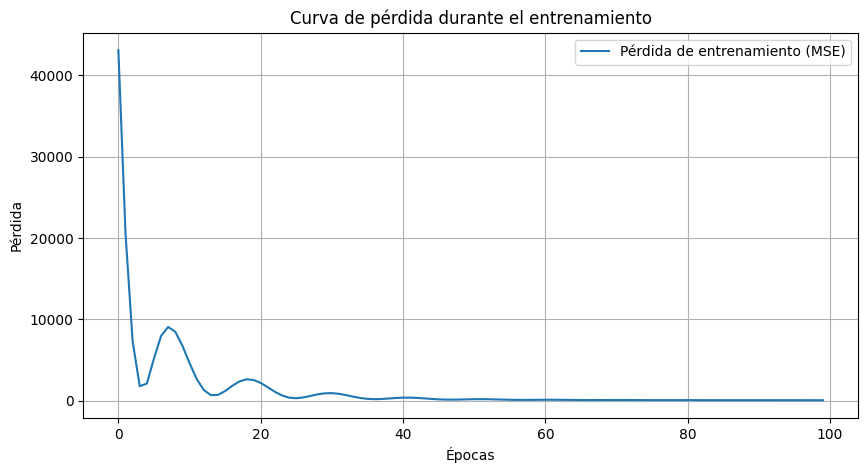

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses, label="Pérdida de entrenamiento (MSE)")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Curva de pérdida durante el entrenamiento")
plt.legend()
plt.grid(True)
plt.show()


Se grafican los primeros 100 valores reales y sus respectivas predicciones para comparar visualmente el rendimiento del modelo.

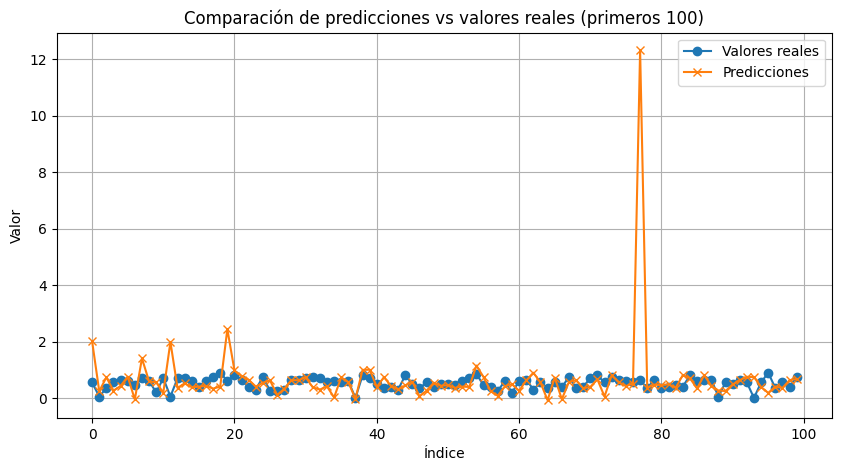

In [ ]:
# Asegúrate de haber hecho la predicción con el modelo ya entrenado
y_pred = model(torch.from_numpy(X_test).float().cuda()).detach().cpu().numpy()
y_true = y_test  # ya está en NumPy

# Graficar valores reales vs predichos
plt.figure(figsize=(10, 5))
plt.plot(y_true[:100], label="Valores reales", marker='o')
plt.plot(y_pred[:100], label="Predicciones", marker='x')
plt.title("Comparación de predicciones vs valores reales (primeros 100)")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()


Se crean las predicciones y los valores reales en un DataFrame de pandas para facilitar la visualización de las diferencias.

np.abs(y_true - y_pred): Calcula la diferencia absoluta entre los valores reales y las predicciones.



In [ ]:
import pandas as pd
import numpy as np

# Asegúrate de tener las predicciones ya generadas
y_pred = model(torch.from_numpy(X_test).float().cuda()).detach().cpu().numpy().flatten()
y_true = y_test.flatten()

# Creamos un DataFrame para ver fácilmente
resultados = pd.DataFrame({
    "Real": y_true,
    "Predicho": y_pred,
    "Diferencia": np.abs(y_true - y_pred)
})

# Mostrar las primeras 20 filas
print(resultados.head(20))


    Real  Predicho  Diferencia
0   0.55  2.004173    1.454173
1   0.05  0.237344    0.187344
2   0.35  0.733325    0.383325
3   0.55  0.259263    0.290737
4   0.65  0.427383    0.222617
5   0.60  0.755096    0.155096
6   0.45 -0.051932    0.501932
7   0.70  1.402359    0.702359
8   0.60  0.589479    0.010521
9   0.20  0.553325    0.353325
10  0.70  0.188231    0.511769
11  0.05  1.984672    1.934672
12  0.70  0.354333    0.345667
13  0.70  0.519535    0.180465
14  0.60  0.381319    0.218681
15  0.40  0.399351    0.000649
16  0.60  0.426929    0.173071
17  0.75  0.332835    0.417165
18  0.90  0.402900    0.497100
19  0.60  2.438074    1.838074


### Concluciones
La pérdida disminuye con el tiempo, lo que indica que la red neuronal está aprendiendo y mejorando gradualmente.
La pérdida en el conjunto de prueba es 0.3248, lo que sugiere que el modelo está funcionando razonablemente bien en los datos de prueba. Sin embargo, hay una diferencia entre la pérdida de entrenamiento y la de prueba, lo que puede indicar algo de sobreajuste si se reduce más la pérdida de entrenamiento.
l MSE también es 0.3248, lo cual está en línea con la pérdida del conjunto de prueba. Un MSE de 0.3248 indica que, en promedio, las predicciones del modelo están a una distancia cuadrada de 0.32 unidades de las verdaderas etiquetas.
Algunos valores de las predicciones tienen errores grandes

### CONCLUCION FINAL
En cuanto a los resultados obtenidos, se pueden observar diferencias claras entre los métodos utilizados. El modelo de regresión lineal mediante descenso por gradiente muestra una buena aproximación a los datos con un MSE de 0.0327 y un RMSE de 0.1808. Sin embargo, las predicciones no son perfectas y algunas presentan diferencias significativas, como la predicción de 2.0041 para el valor real de 0.55, lo que indica que el modelo tiene dificultades para generalizar ciertos patrones.

Por otro lado, la red neuronal MLP muestra un comportamiento más errático, con un MSE de 0.3248 en el conjunto de prueba, que es notablemente más alto que el de la regresión lineal. Aunque durante el entrenamiento se observa una mejora continua en la pérdida, las predicciones siguen siendo bastante imprecisas, con diferencias bastante grandes como en el caso de la predicción de 2.4381 para el valor real de 0.60.

En general, el modelo de regresión lineal parece ser más confiable en este contexto específico, ya que ofrece un rendimiento más consistente, a pesar de que la red neuronal tiene una mayor capacidad de modelar relaciones complejas. Sin embargo, ambos modelos podrían mejorarse con más datos o ajustes adicionales, y sería útil explorar técnicas como la regularización o una mayor optimización en la red neuronal para reducir el error.